# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
# Start coding her

### Business Focus
The business aims to provide cost effective and nutritious recipes for customers.

In [1]:
# Start coding here...
import pandas as pd
from sklearn.preprocessing import  FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost as xgb
from imblearn.combine import SMOTETomek

import warnings
warnings.simplefilter(action='ignore', category='FutureWarning')

### Reading the data into pandas

In [2]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


### Data Validation

In [3]:
df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [4]:
print(df['servings'].unique())
print(df['category'].unique())
print(df['high_traffic'].unique())

['6' '4' '1' '2' '4 as a snack' '6 as a snack']
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
['High' nan]


### From the description Servings is meant to be an integer so we will convert it to integer and also transform the high_traffic column

In [5]:
df['high_traffic'] = df['high_traffic'].apply(lambda x: 'High' if x == 'High' else 'Low')
df['servings'] = df['servings'].apply(lambda x: '4' if x == '4 as a snack' else x)
df['servings'] = df['servings'].apply(lambda x: '6' if x == '6 as a snack' else x)

In [6]:
df['high_traffic'].unique()

array(['High', 'Low'], dtype=object)

In [7]:
df['servings'].unique()

array(['6', '4', '1', '2'], dtype=object)

In [8]:
df['servings'] = df['servings'].astype('int64')

In [9]:
df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings          int64
high_traffic     object
dtype: object

In [10]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
recipe,947.0,NaN,NaN,NaN,474.0,273.519652,1.0,237.5,474.0,710.5,947.0
calories,895.0,NaN,NaN,NaN,435.939196,453.020997,0.14,110.43,288.55,597.65,3633.16
carbohydrate,895.0,NaN,NaN,NaN,35.069676,43.949032,0.03,8.375,21.48,44.965,530.42
sugar,895.0,NaN,NaN,NaN,9.046547,14.679176,0.01,1.69,4.55,9.8,148.75
protein,895.0,NaN,NaN,NaN,24.149296,36.369739,0.0,3.195,10.8,30.2,363.36
category,947,11,Breakfast,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
servings,947.0,NaN,NaN,NaN,3.477297,1.732741,1.0,2.0,4.0,4.0,6.0
high_traffic,947,2,High,574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['high_traffic'].value_counts(normalize=True)

High    0.606125
Low     0.393875
Name: high_traffic, dtype: float64

In [13]:
df.shape

(947, 8)

### Exploratory data Analysis and Visualization

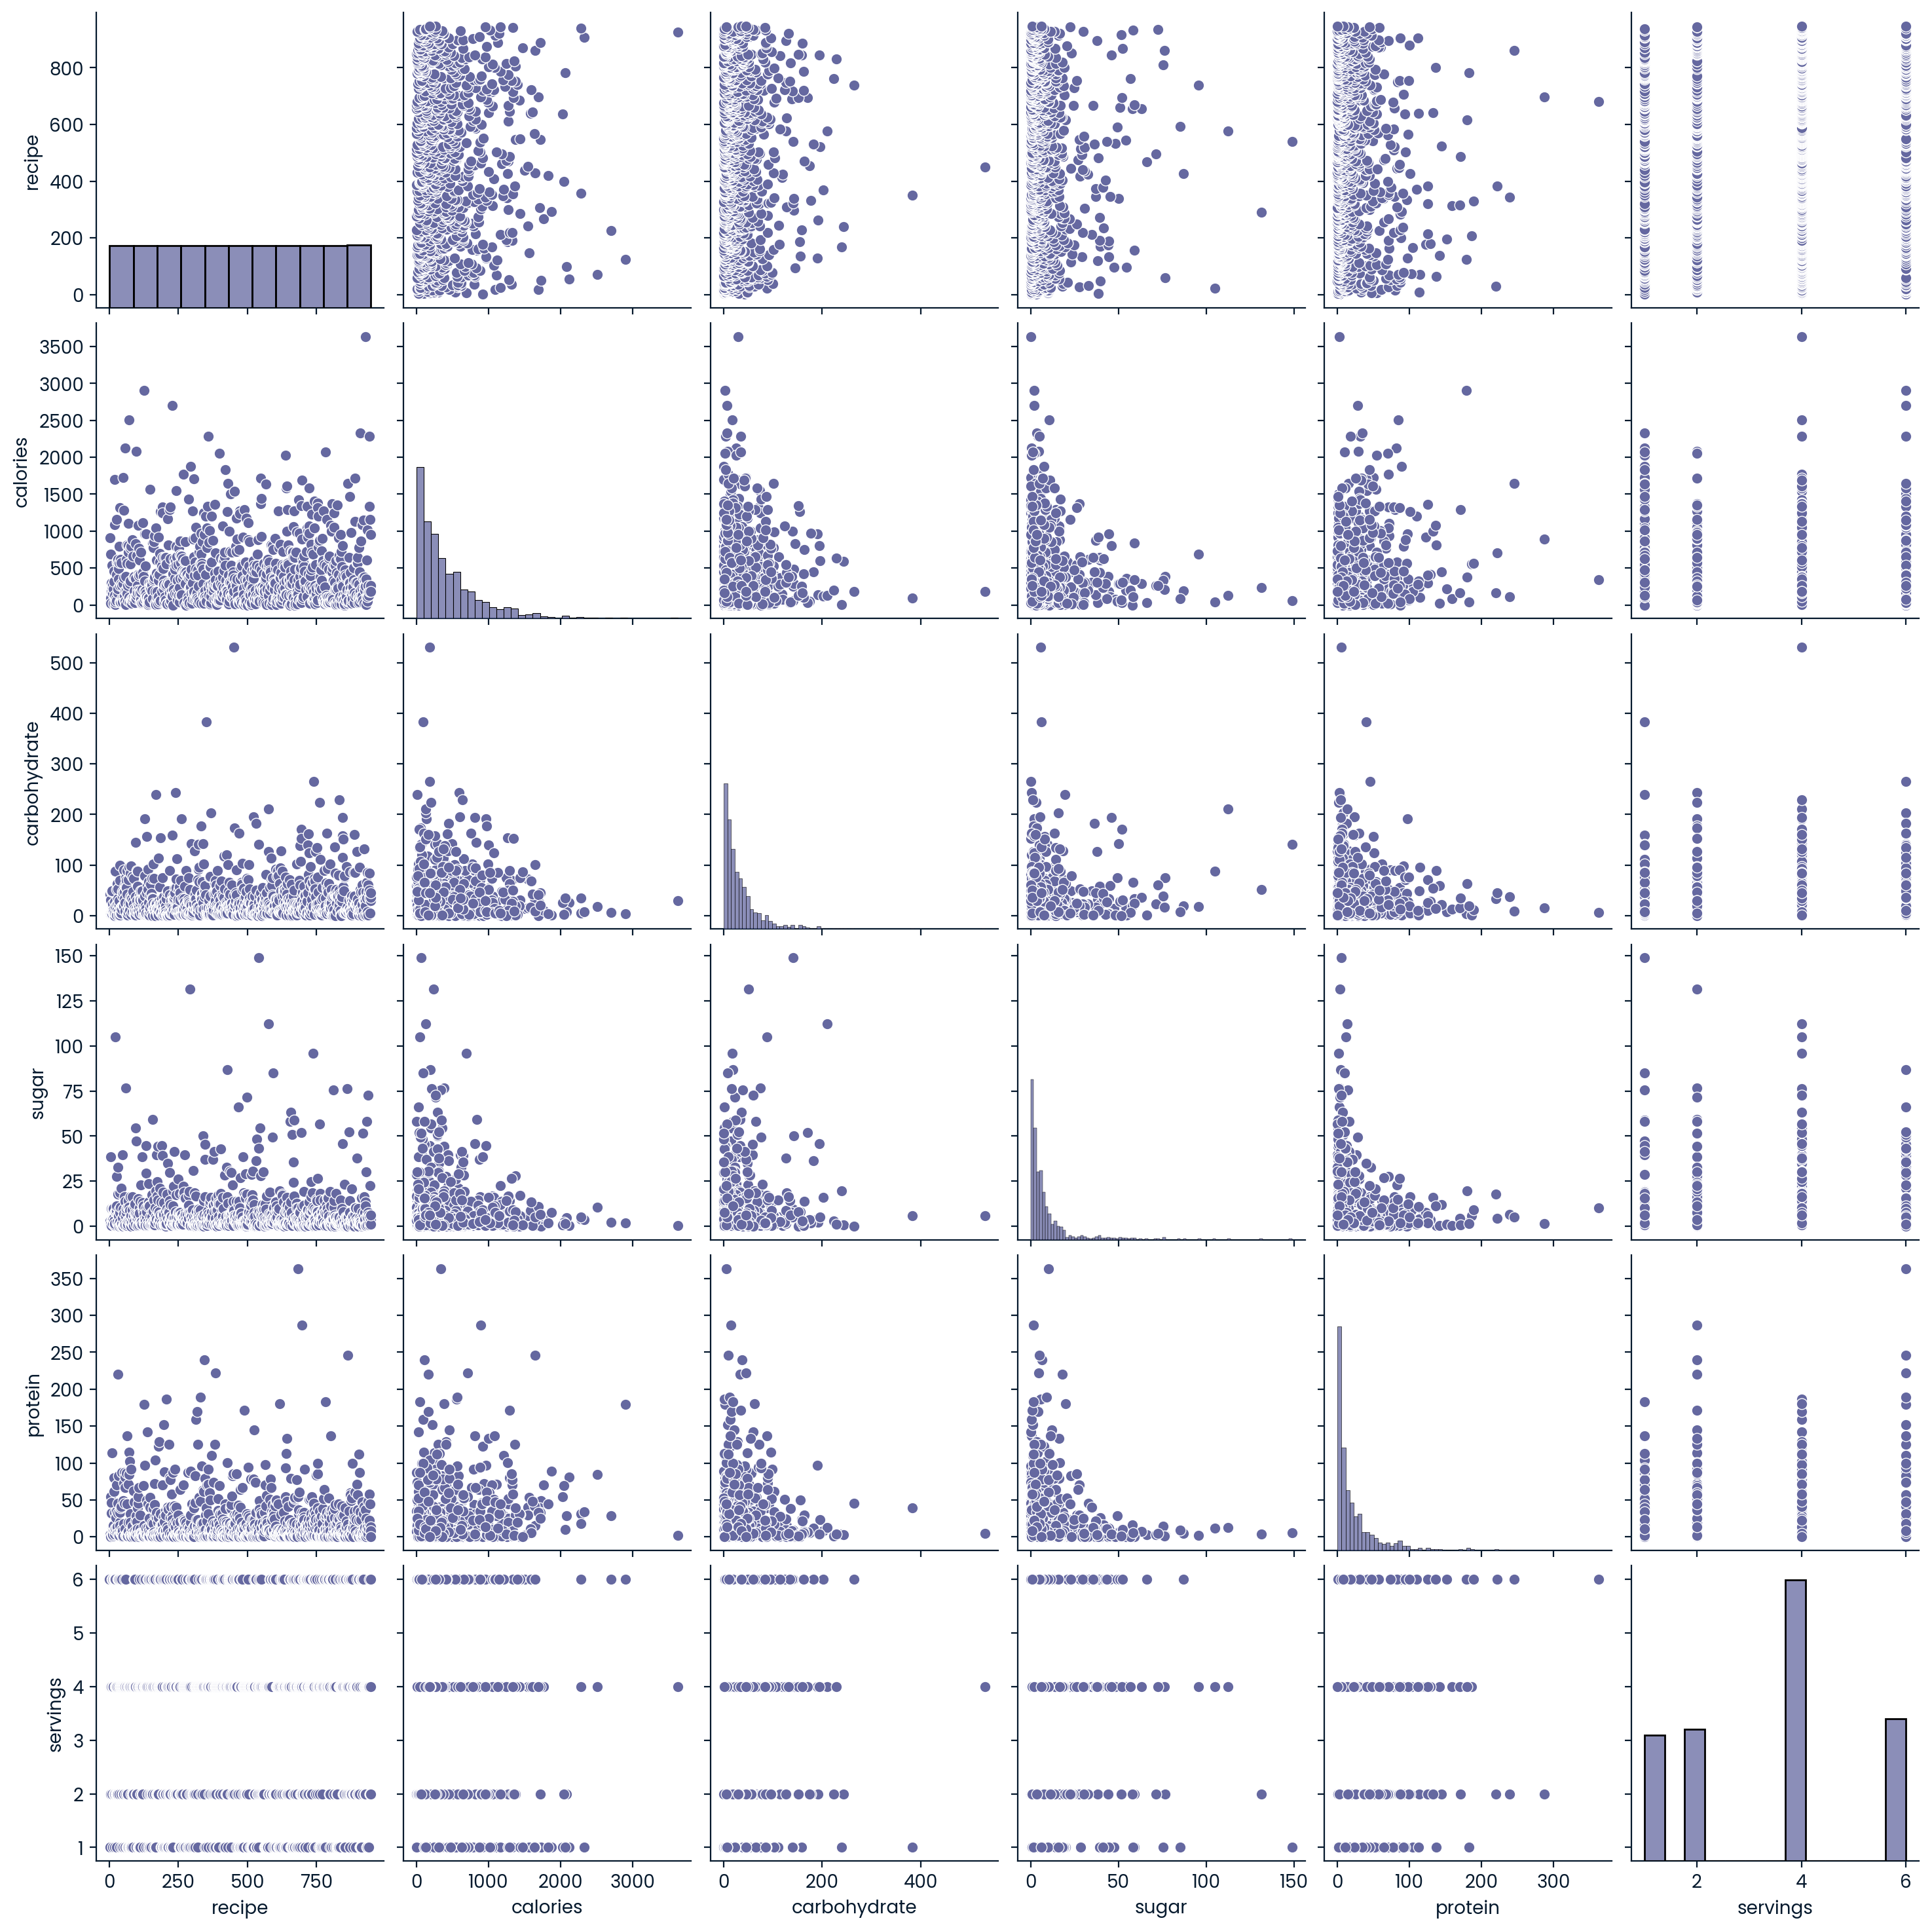

In [14]:
sns.pairplot(df, diag_kind='hist')
plt.show()

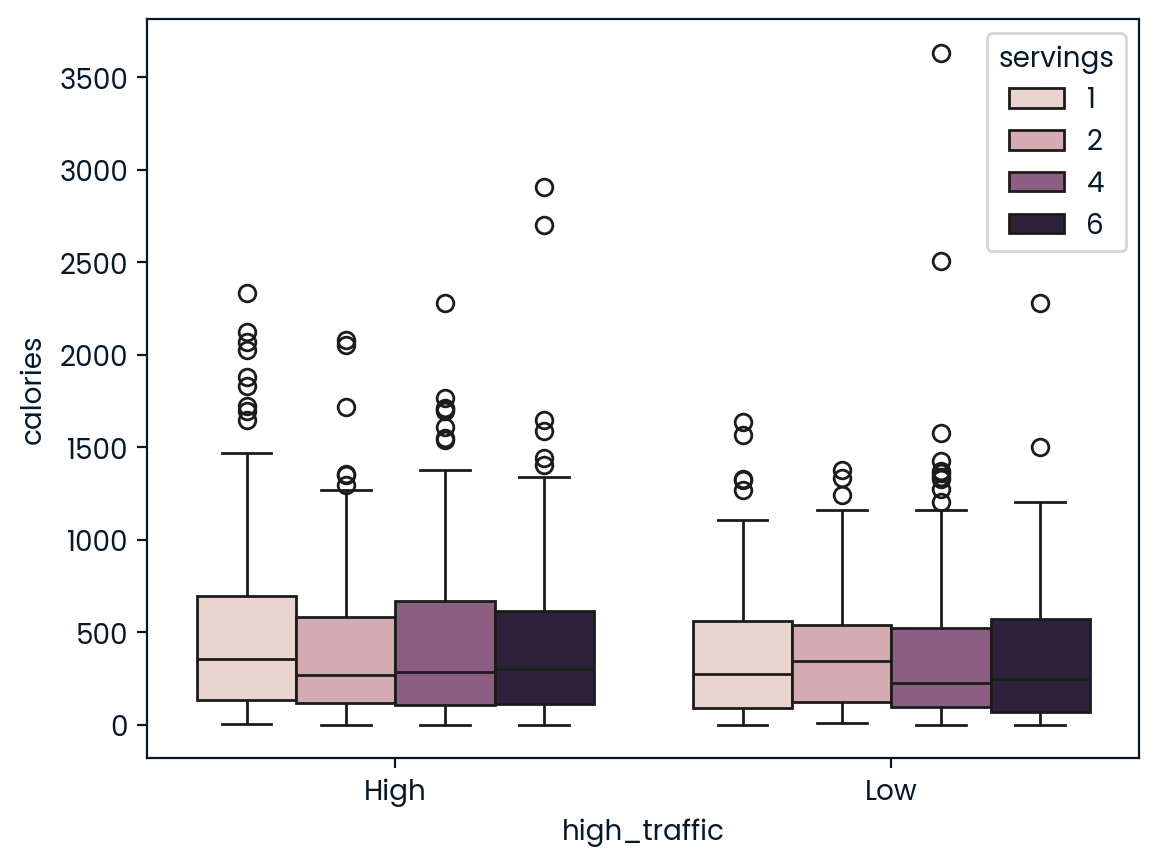

In [15]:
sns.boxplot(x='high_traffic', y='calories', hue='servings', data=df)
plt.show()

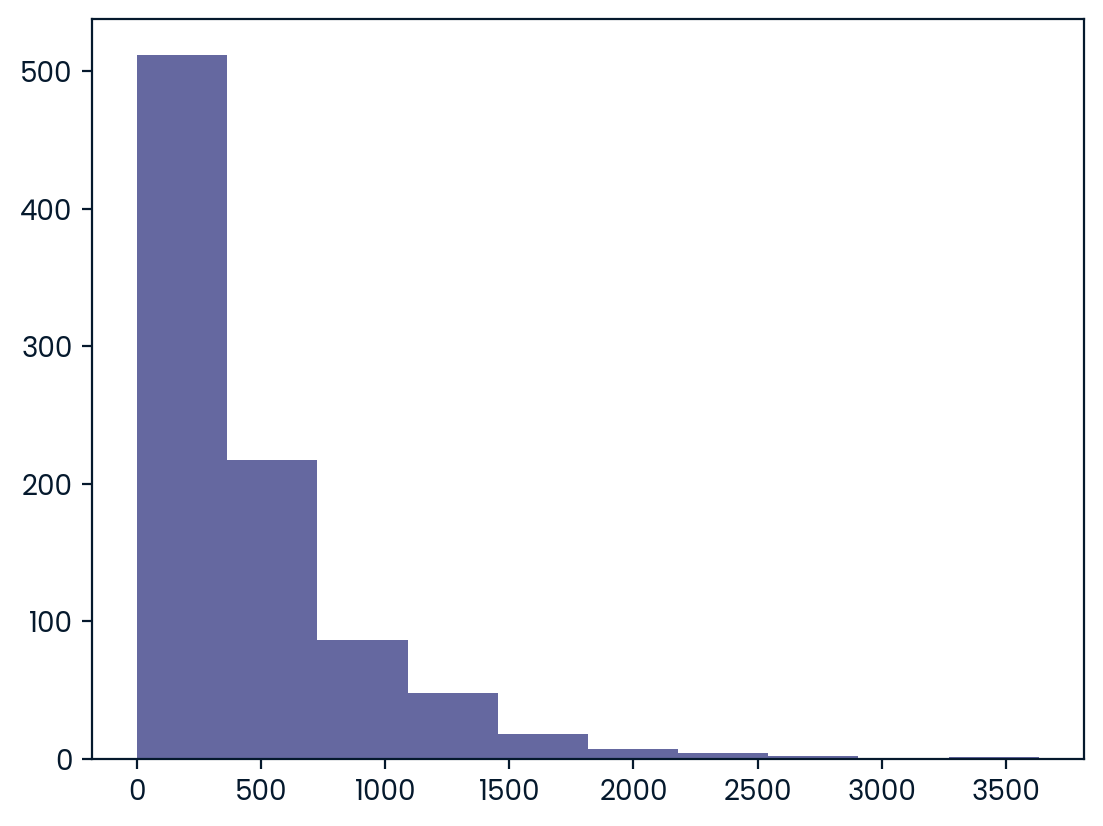

In [16]:
plt.hist(df['calories'])
plt.show()

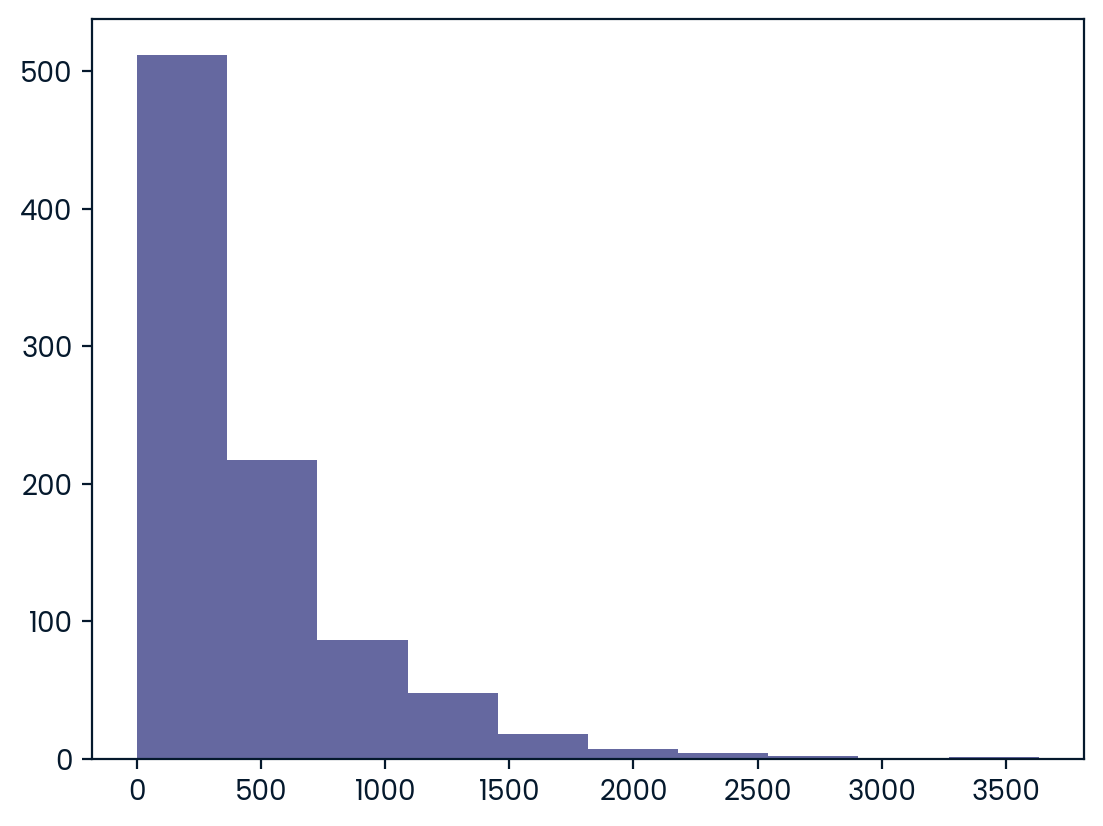

In [17]:
plt.hist(df['calories'])
plt.show()

### Findings from EDA

From the visualizations above, it can be clearly seen that the data is skewed and contains many outliers. We will perform scaling operations in order to normalize the data.

### Filling missing values and scaling the data to take on a normal Distribution

### Encoding the Categorical data

In [18]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low


In [35]:
X = df.drop(columns=['high_traffic'])
y = df['high_traffic']
X_main = pd.get_dummies(X, drop_first=True)

In [36]:
imputer = SimpleImputer(strategy='mean')
X_df = imputer.fit_transform(X_main)
X_df = pd.DataFrame(X_df, columns=X_main.columns)
X_df.isna().sum()
X_df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,1.0,435.939196,35.069676,9.046547,24.149296,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,35.480000,38.560000,0.660000,0.920000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,914.280000,42.680000,3.090000,2.880000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,97.030000,30.560000,38.630000,0.020000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,27.050000,1.850000,0.800000,0.530000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, stratify=y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(757, 16)
(190, 16)
(757,)
(190,)


### It appears the target class is unbalanced we will balance the data with Smote


In [39]:
y_train.value_counts(normalize=True)

High    0.606341
Low     0.393659
Name: high_traffic, dtype: float64

### It appears the target class is unbalanced we will balance the data with Smote

In [40]:
smote = SMOTETomek()

X_train_synth, y_train_synth = smote.fit_resample(X_train, y_train)


y_train_synth.value_counts(normalize=True)

Low     0.5
High    0.5
Name: high_traffic, dtype: float64

### Rescaling the data

In [41]:
transform = FunctionTransformer(np.log1p)
X_train_scaled = transform.fit_transform(X_train_synth)

X_train_scaled

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,6.021023,5.939250,3.663562,1.854734,3.220475,1.945910,0.0,0.0,0.0,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.0
1,6.538140,6.185488,4.126166,0.717840,1.695616,1.609438,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.693147,0.0
2,5.267858,7.126810,4.327702,0.559616,2.219203,1.098612,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.000000,0.0
3,5.866468,6.079794,3.585453,2.307229,3.224830,1.609438,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.693147,0.0
4,6.098074,6.576177,3.255401,1.463255,2.839663,1.945910,0.0,0.0,0.0,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.0


### Visualizing the scaled dataset

<AxesSubplot: >

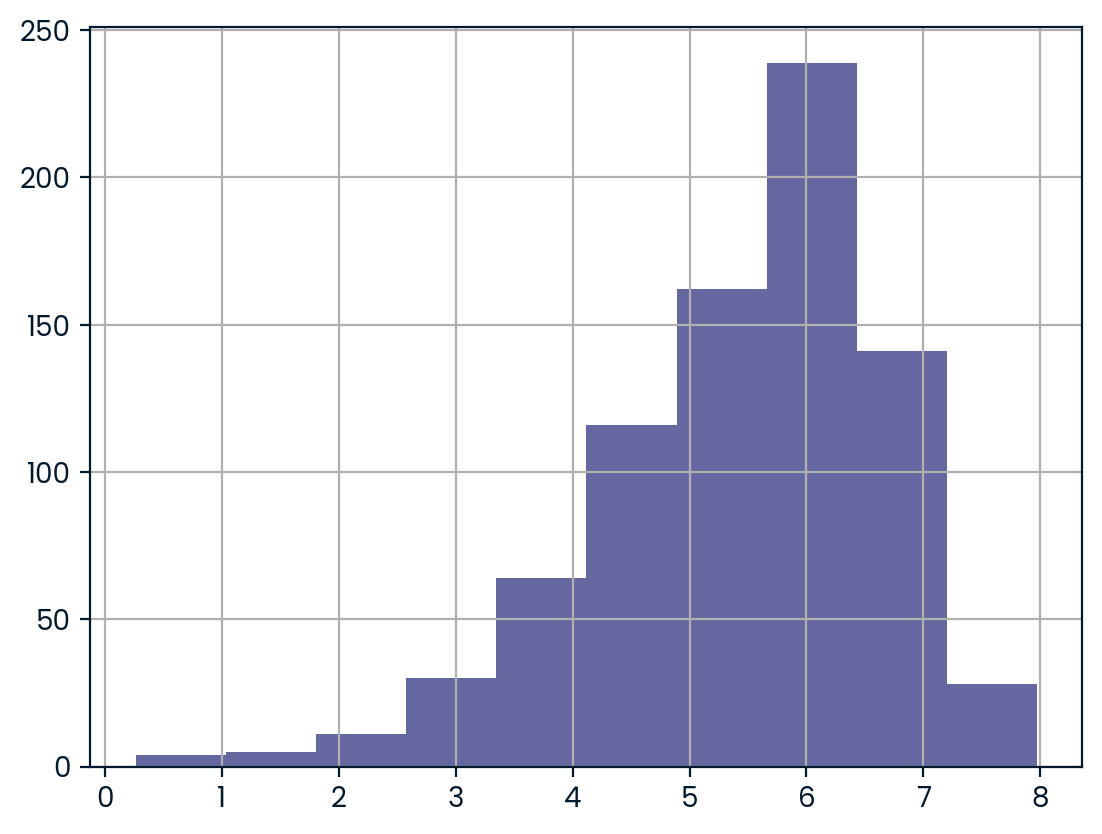

In [42]:
X_train_df['calories'].hist()

### It appears the target class is unbalanced we will balance the data with Smote

### Model Development

Problem Type: This is a binary classification problem.

The baseline model for this project will be the LogisticRegression model is a linear model that is designed to distinguish between binary classes. 
In this project I will work with Boosting Tree algorithms. This is because these kinds of algorithms improve their performance by correcting the errors of weaker models and are robust to complex data distributions. This reduces bias and variance; improving predictive power and generalization. Additionally, boosting algorithms handle imbalance or skewness in data and can achieve high accuracy with lesser overfitting compared to ordinary linear models.

This is a classification problem. The goal is to classify which food recipes are likely to attract customers.

In [43]:
y_train_synth.head()
# X_train_synth.head()

0     Low
1    High
2     Low
3    High
4    High
Name: high_traffic, dtype: object

### Baseline model

Training a baseline model

In [44]:
lr = LogisticRegression()
lr.fit(X_train_df, y_train_synth)

X_test_scaled = transform.fit_transform(X_test)


X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_test_synth, y_test_synth = smote.fit_resample(X_test_df, y_test)



### Training a RandomForestClassifier on the dataset

In [45]:
rf = RandomForestClassifier(n_estimators=250, min_samples_split=6, min_samples_leaf=2, max_depth=12)
rf.fit(X_train_df, y_train_synth)

RandomForestClassifier(max_depth=12, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=250)

### Model Performance KPIs

The following model performance KPIs will be used:
1. Accuracy Score
2. ROC AUC Score


### Model Evaluation

Evaluating the models' ability to accurately distinguish between the two classes using ROC_AUC_SCORE

In [46]:
# model.score(X_test_df, y_test)
base_model_acc = accuracy_score(y_test_synth, lr.predict(X_test_synth))
print(f"Baseline model Accuracy is {base_model_acc}")

rf_model_acc = accuracy_score(y_test_synth, rf.predict(X_test_synth))
print(f"RandomForest Model Accuracy: {rf_model_acc}")

Baseline model Accuracy is 0.7285714285714285
RandomForest Model Accuracy: 0.7714285714285715


In [47]:
base_model_auc = roc_auc_score(y_test_synth, lr.predict_proba(X_test_synth)[:, 1])
rf_model_auc = roc_auc_score(y_test_synth, rf.predict_proba(X_test_synth)[:,1])

In [48]:
print(f"Baseline model ROC AUC SCORE: {base_model_auc}")
print(f"RandomForest ROC AUC SCORE: {rf_model_auc}")

Baseline model ROC AUC SCORE: 0.8142403628117914
RandomForest ROC AUC SCORE: 0.8472562358276644


### Validating model performance on Key performance indicators

### Business Metrics

Business Focus

The business aims to find best combination of recipes that will increase user traffic on the site. The recipes will result in increased user subscriptions and purchases.

### Comparing models based on KPIs

The comparison model performs better than the baseline model with and accuracy of 77%. This is a considerable good performance. Also from the ROC AUC SCORE the RandomForest model performs extremely better in distringuishing between the two classes in the test dataset.  Higher ROC AUC SCORE indicates bettter performance in ranking recipes by their likelihood of generating traffic and this is captured by the RandomForestmodel

## Review of business Problem and Recommendations

### Business Problem Solution

This project has been able to correctly identify recipe combinations that will generate high traffic on the site with an accuracy of 77%. This is a great way of automating the problem solving process of choosing which recipes to display on the website as it is now easy to find the correct mixtures that will drive traffic with a high degree of accuracy. Based on the predictions, we can determine what food to choose to get our desired traffic on the website

## Summary and Recommendations

### Recommendations

#### The following recommendations are worth taking note of:

1. Measuring the direct impact of the model on business KPIs, such as increased traffic, or revenue growth. The model should be able to drive a considerable increase in traffic on the site, if this does not happen then we might need to recall our strategies and retrain the model.
2. Model Deployment: The model should be deployed in real time on the website so that predictions can be taken on new combinations of recipe to determine if they will generate traffic or not.
3. AB Testing: Conduct A/B tests to compare the performance of model-generated recommendations againts a control group. Analyze the difference in the user engagemen and conversion rates.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation